# Clustering
- 비지도 학습 (Unsupervised Learning)
- Label이 존재하지 않는다 
  - train, test데이터를 분리할 필요가 없음, 하나의 데이터로 진행<br>
  ✅실제 업무에서는 코드 중 predict 부분에 **새로운 데이터**를 넣고, 그 데이터가 어떤 클러스터에 속하는지 판단하는 것이 목적!!

### Cluster의 기준 
- 데이터들은 서로 비슷한 정도에 따라 클러스터를 구성 
- 다양한 기준 모델이 존재함 
  - Centroid model
  - Hierachical (Connectivity) model
  - Density model
___

## Centroid model 
- 클러스터를 만들 때 **기준 데이터**를 사용하여 분포에 따라 cluster 구성 
- 기준 데이터는 '데이터 셋(set)'에 포함될 필요 없음 
- 기준 데이터 : 중앙값(median), 평균값(mean)을 주로 사용
- 예) k-means algorithms  

***

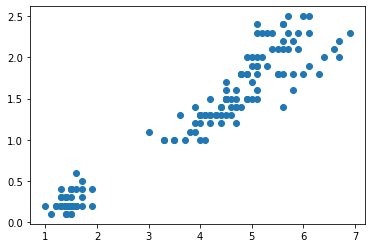

In [23]:
# Centroid model(K-means 예시)
petals = pd.DataFrame(iris_data_pd.values[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
plt.scatter(petals.values[:, 0], petals.values[:, 1])
plt.show()


## K-means algorithms ✅ 
- 'K'는 주어진 **데이터를 K개로 클러스트링** 하고 K의 평균값을 활용 
- 'K'개의 기준은 사용자가 '직접' 정해야함  


### K 값의 중요성❗️
- 적절한 K의 선택이 클러스터의 갯수 및 데이터 분류에 영향을 미침 ➡️ 클러스터의 신뢰도!!  


### 기준 데이터 선정 
- 어떻게 기준 데이터를 선정할 지에 따라 클러스터된 모델도 달라짐 - K-means 알고리즘을 통해 적적한 값을 선정  

- **K-means Clustering 기준값 조정 규칙**
  1. 클러스터 내의 기준과 데이터들의 거리합 최소 <br>
    - 데이터의 밀도, 응집도가 높아짐<br>
    $ Min(\displaystyle\sum_{i=1}^{K} \sum_{x\in G_i}{}distance(c_i,x))$
  2. 각각 클러스터간 거리 최대
    - 클러스터 사이의 여유 공간이 있으면 추후 데이터를 새로 추가할 때 오판할 가능성을 낮춘다 <br>
  $Max(\displaystyle\sum_{i,j=1}^{K}distance(c_i,c_j), i \neq j)$  

### K-means Clustering 알고리즘📝
1. K개의 집합으로 **임의로** 분할을 진행 <br>
⬇️
2. 규칙 1,2번에 맞도록 각 집합의 기준 데이터들을 집한 안 원소들의 '평균값'으로 조정<br>
⬇️
<br>
3. 조정된 결과에 맞춰 새롭게 다시 집합으로 분류<br>
⬇️
<br>
4. 조정과 분류 과정을 계속 반복 하며 기준 데이터값 최적화 <br>
⬇️
<br>
5. 더 이상 점들이 다른 집합에 분류되는 일없이 일정한 집합에 계속 소속될 때 반복을 중지!! 


In [39]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

* 데이터 로드

In [5]:
iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns = iris.feature_names)
print(iris_data_pd)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


* Clustering 시각화 및 학습
  - 분류 갯수 k = 2 로 설정

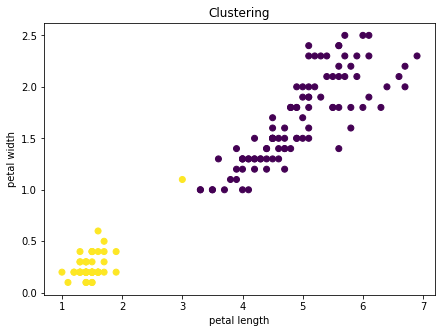

In [25]:
from sklearn.cluster import KMeans

plt.figure(figsize=(7,5))
km = KMeans(n_clusters =2, random_state=20)
km.fit(iris_data_pd.iloc[:,2:4])                      # 데이터 훈련 (동일 데이터)
y_pred = km.predict(iris_data_pd.iloc[:,2:4])         # 데이터 예측 (동일 데이터)
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)

plt.title("Clustering")
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.show()

In [26]:
# 유별나게 혼자 띄어져 있는 점이 있음
print(km.predict(iris_data_pd.iloc[:,2:4]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [27]:
# 98번째 점의 특성을 확인 
print(iris_data_pd.iloc[98, 2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [28]:
# 각 클러스터(0,1)의 센터를 확인 
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

* 각 기준점부터의 'Euclidian' 거리를 계산

In [29]:
# 거리가 가까운 1 cluster 기준점에 더 가까움 (노랑색)
def distance(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  squared = dx**2 + dy**2
  result = math.sqrt(squared)
  return result

print('0 cluster distacne: ', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[0][0], 
                                       km.cluster_centers_[0][1]))

print('1 cluster distacne: ', distance(iris_data_pd.iloc[98, 2], iris_data_pd.iloc[98, 3], km.cluster_centers_[1][0], 
                                       km.cluster_centers_[1][1]))


0 cluster distacne:  2.0112458036464465
1 cluster distacne:  1.7246990164733285


* 분류 갯수를 바꿔보면서 확인하기

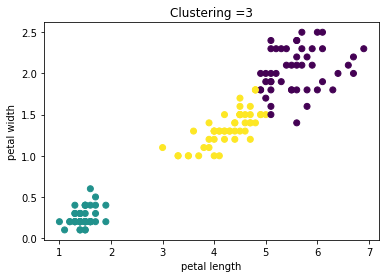

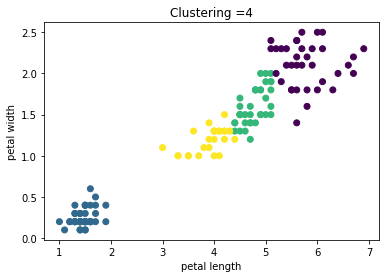

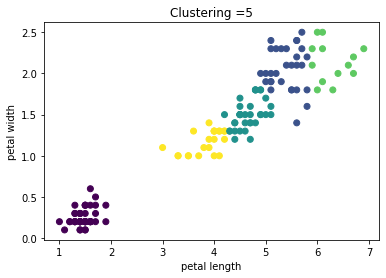

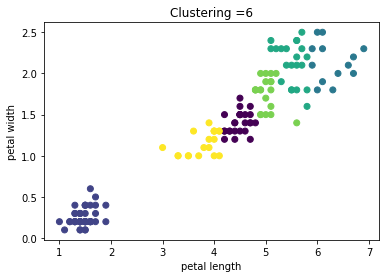

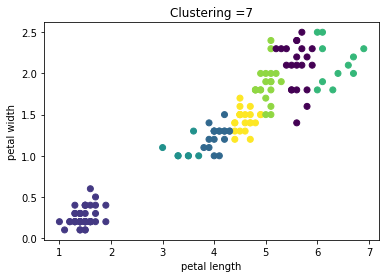

In [36]:
# 어떤 것이 가장 좋다고 단정 지을 순 없지만, k = 3이 가장 보기 편한다 

n_cluster = [3, 4, 5, 6, 7]

for i in n_cluster:
  count = 1
  km = KMeans(n_clusters= i, random_state=20)
  km.fit(iris_data_pd.iloc[:, 2:4])
  y_pred = km.predict(iris_data_pd.iloc[:, 2:4])
  plt.figure(count)
  plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)

  plt.title('Clustering ='+ str(i))
  plt.xlabel('petal length')
  plt.ylabel('petal width')
  count = count + 1
  plt.show()

* 클러스터들을 각 영역별로 쪼개어 표시할 수 있는 Voronoi 그래프로 묘사 

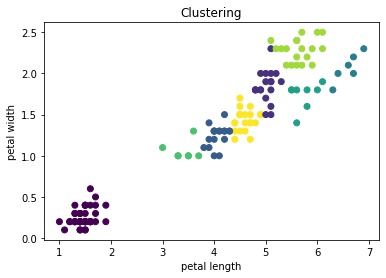

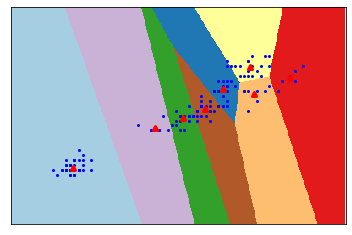

In [42]:
km12 = KMeans(n_clusters =8, random_state=20)
km12.fit(iris_data_pd.iloc[:, 2:4])
y_pred12 = km12.predict(iris_data_pd.iloc[:, 2:4])
plt.title('Clustering')
plt.xlabel('petal length')
plt.ylabel('petal width')
graph1 = plt.scatter(iris_data_pd.iloc[:, 2], iris_data_pd.iloc[:, 3], c=y_pred12)
plt.show()

h = .02
#plot the decision boundary. For that, we will assign a color to each
x_min, x_max = iris_data_pd.iloc[:, 2].min() -1, iris_data_pd.iloc[:, 2].max()+1
y_min, y_max = iris_data_pd.iloc[:, 3].min() -1, iris_data_pd.iloc[:, 3].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Obtain labels for each point in mesh. Use last trained model.
z = km12.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot 
Z= z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], 'bo', markersize=2)

# Plot the centroids as a white X
centroids = km12.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=16, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 다른 데이터를 사용해서 Clustering
- make_moons( )

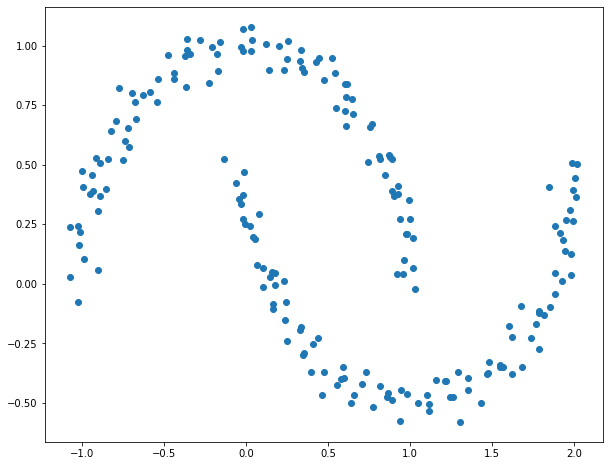

In [43]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,y = make_moons(200, noise =0.05, random_state=0)

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.show()

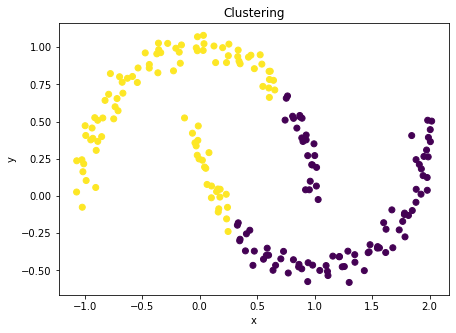

In [56]:
# 사람에게 크러스터링을 요구하면 달 위쪽, 아래쪽 경계를 진행할 것 
# K-means는 선을 기준으로함.. 제대로 해주지 못한다는 단점s....

plt.figure(figsize=(7,5))
km = KMeans(n_clusters =2, random_state=20)
km.fit(X[:,0:2])                     
y_pred = km.predict(X[:,0:2])         
plt.scatter(X[:,0],X[:,1], c=y_pred)

plt.title("Clustering")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

* 간단하게 Clustering 결과 구하기

In [64]:
from sklearn.cluster import KMeans

clusters = KMeans(2).fit_predict(X)

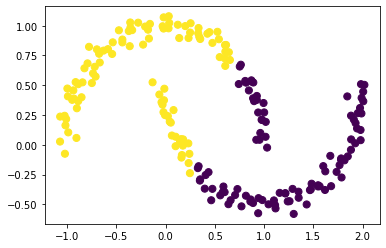

In [67]:
plt.scatter(X[:,0], X[:,1], c=clusters, s=50, cmap='viridis')

## digits 데이터 분석하기

In [69]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape       # 64차원의 데이터 

(1797, 64)

In [83]:
km = KMeans(10)                      # k= 10으로 두고 학습
clus = km.fit_predict(digits.data)

In [86]:
km.cluster_centers_.shape           # 64차원 데이터 10개 

(10, 64)

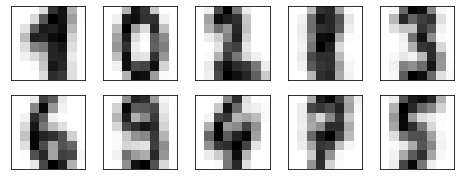

In [87]:
# center 라는 것은 clsuter의 평균값들을 찍은 것
# 향후 사용자가 숫자를 입력 했을 때, 아래 학습된 내용을 보고 판단함 
fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = km.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)